In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd
import os
from typing import  List
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import time
from tqdm import tqdm_notebook as tqdm
import seaborn as sns

In [3]:
def text_to_dataframe(pth:str, col_names:List[str] )->pd.DataFrame:
    """
    text_to_dataframe:
    
    Read throught a list of folders of  text files

    Parameters:
            pth = str: directories of folders 

            col_names= List[str] :  A list of strings that will be the column of the data 

    Return: 
        A dataframe  
    """
    #  get the first folder
    dir_list = os.listdir(pth) 
    
    df_list= []
    # loop throught the first folder
    for folders in dir_list:
        # get the second folder inside the 1st folder
        folder_name = os.listdir(f"{pth}/{folders}") 
        # loop throught the second foldder
        for files in folder_name:
            # open the files in each folder
            f = open(f'{pth}/{folders}/{files}')
            # reading lines of each file
            read_file=f.readlines() 
            
            df1=np.append(read_file, folders)
            df_list.append(df1)
    data=pd.DataFrame(df_list, columns=col_names)

    return data


In [2]:
# Defining the column names
column=['Reviews', 'Sentiment']

In [4]:
# putting the text into a data from  and assigning 0 for neg folder and 1 for pos folder
df1=text_to_dataframe('test', column)

df2=text_to_dataframe('train', column)

In [5]:
## merging the data

df=pd.concat([df1, df2], ignore_index=True)

In [6]:
# converting the into integer of 0 and 1. zero for negative reviews and 1 for positive reviews
df['Sentiment']=df['Sentiment'].map({'neg': 0, 'pos': 1})

### Text

In [10]:
positive = df[df['Sentiment']==1]['Reviews']
negative = df[df['Sentiment']==0]['Reviews']

CPU times: total: 2min 5s
Wall time: 3min 5s


Text(0.5, 1.0, 'Negative')

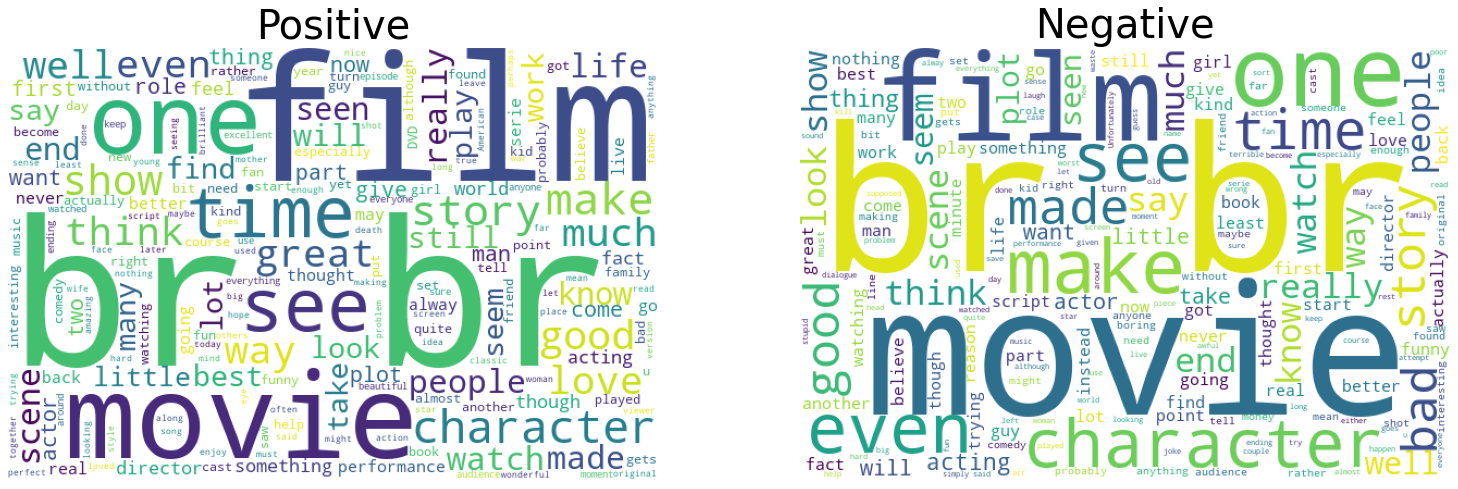

In [11]:
%%time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])

wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(positive))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive', fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(negative))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative',fontsize=40);

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

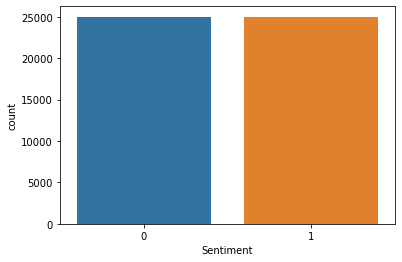

In [12]:
sns.countplot(x='Sentiment', data=df)


In [13]:
df.isnull().sum()

Reviews      0
Sentiment    0
dtype: int64